In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载 iris 数据集
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # 选择花瓣长度和花瓣宽度
y = iris.target

# 只选择类别 0 和类别 1
X = X[y != 2]
y = y[y != 2]

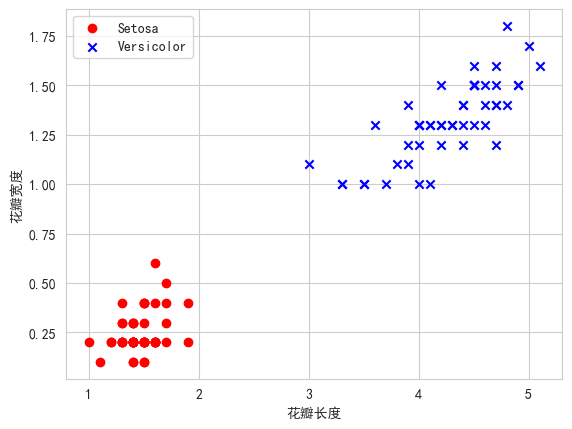

In [2]:
# 绘制散点图
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.legend()
plt.show()


In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

# 建立逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [4]:
print('模型系数（权重）：', model.coef_)
print('模型截距：', model.intercept_)


模型系数（权重）： [[1.89055454 0.84470153]]
模型截距： [-5.78240187]


In [5]:
y_pred = model.predict(X_test)
print('预测值：', y_pred)
print('实际值：', y_test)
print('分类准确率：', accuracy_score(y_test, y_pred))

预测值： [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1]
实际值： [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1]
分类准确率： 1.0


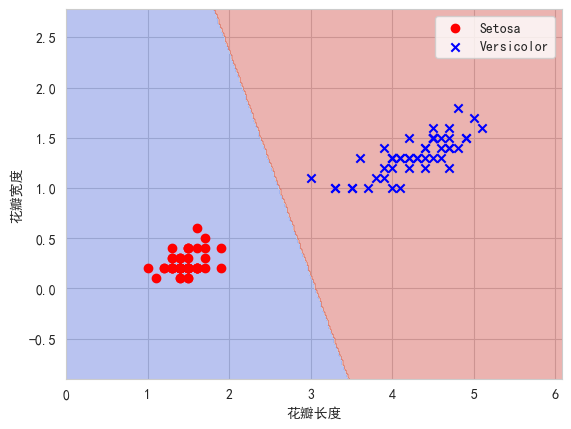

In [6]:
# 定义坐标轴范围
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 生成网格点
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 预测网格点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制等高线图和散点图
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.legend()
plt.show()


In [7]:
# 创建两个模型，分别使用 'ovr' 和 'multinomial' 作为多分类策略
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')      # 'ovr' 适合 binary 和 multiclass
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # 'multinomial' 常用于多项式逻辑回归
# 使用 OneVsRestClassifier 和 OneVsOneClassifier 进行分类
model_ovr_svc = OneVsRestClassifier(SVC(kernel='linear'))
model_ovo_svc = OneVsOneClassifier(SVC(kernel='linear'))

# 训练模型
model_ovr.fit(X_train, y_train)
model_multinomial.fit(X_train, y_train)
model_ovr_svc.fit(X_train, y_train)
model_ovo_svc.fit(X_train, y_train)


# 输出模型系数和截距
print("One-vs-Rest (OvR) 模型系数：", model_ovr.coef_)
print("One-vs-Rest (OvR) 模型截距：", model_ovr.intercept_)
print("Multinomial 模型系数：", model_multinomial.coef_)
print("Multinomial 模型截距：", model_multinomial.intercept_)
# 对于 OneVsRestClassifier 和 OneVsOneClassifier 的支持向量情况
print("One-vs-Rest SVM 模型支持向量数：", [estimator.n_support_ for estimator in model_ovr_svc.estimators_])
print("One-vs-One SVM 模型支持向量数：", [estimator.n_support_ for estimator in model_ovo_svc.estimators_])
# 如果想要展示支持向量，可以通过以下代码查看
print("One-vs-Rest SVM 支持向量：", [estimator.support_vectors_ for estimator in model_ovr_svc.estimators_])
print("One-vs-One SVM 支持向量：", [estimator.support_vectors_ for estimator in model_ovo_svc.estimators_])


One-vs-Rest (OvR) 模型系数： [[0.68729133 1.19430796]]
One-vs-Rest (OvR) 模型截距： [-2.24788831]
Multinomial 模型系数： [[1.132599   0.52782588]]
Multinomial 模型截距： [-3.44527331]
One-vs-Rest SVM 模型支持向量数： [array([1, 1])]
One-vs-One SVM 模型支持向量数： [array([1, 1])]
One-vs-Rest SVM 支持向量： [array([[1.9, 0.4],
       [3. , 1.1]])]
One-vs-One SVM 支持向量： [array([[1.9, 0.4],
       [3. , 1.1]])]


In [8]:
# 预测测试集并计算准确率
y_pred_ovr = model_ovr.predict(X_test)
y_pred_multinomial = model_multinomial.predict(X_test)
y_pred_ovr_svc = model_ovr_svc.predict(X_test)
y_pred_ovo_svc = model_ovo_svc.predict(X_test)

print("One-vs-Rest (OvR) 分类准确率：", accuracy_score(y_test, y_pred_ovr))
print("Multinomial 分类准确率：", accuracy_score(y_test, y_pred_multinomial))
print("One-vs-Rest SVM 分类准确率：", accuracy_score(y_test, y_pred_ovr_svc))
print("One-vs-One SVM 分类准确率：", accuracy_score(y_test, y_pred_ovo_svc))


One-vs-Rest (OvR) 分类准确率： 1.0
Multinomial 分类准确率： 1.0
One-vs-Rest SVM 分类准确率： 1.0
One-vs-One SVM 分类准确率： 1.0


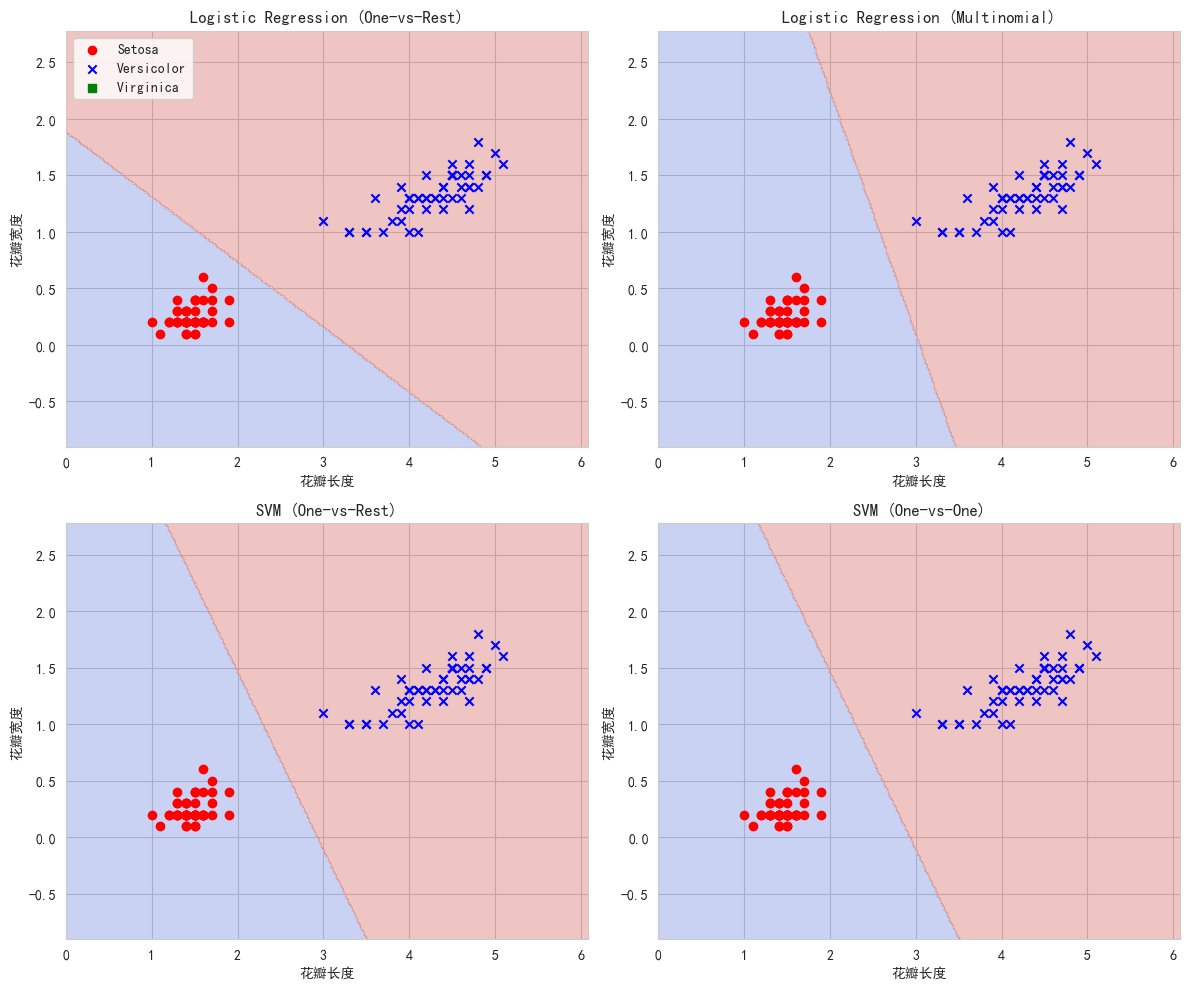

In [9]:
# 定义坐标轴范围
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ["Logistic Regression (One-vs-Rest)", "Logistic Regression (Multinomial)",
          "SVM (One-vs-Rest)", "SVM (One-vs-One)"]

# 预测网格点的类别并绘制决策边界
models = [model_ovr, model_multinomial, model_ovr_svc, model_ovo_svc]

for i, model in enumerate(models):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[i // 2, i % 2]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # 绘制训练数据的散点图
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Setosa')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Versicolor')
    ax.scatter(X[y == 2, 0], X[y == 2, 1], color='green', marker='s', label='Virginica')
    ax.set_title(titles[i])
    ax.set_xlabel('花瓣长度')
    ax.set_ylabel('花瓣宽度')

# 添加图例
axes[0, 0].legend(loc='upper left')

# 显示图像
plt.tight_layout()
plt.show()